## Densely-Connected Neural Network
### Equipo Jerry
En este documento se intentará realizar la predicción de viajes con el dataset que obtuvimos durante la Etapa 3.

In [ ]:
# Importamos el archivo leyendo desde Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

# Asignamos el directorio en el que se encuentra
directorio = '/content/gdrive/MyDrive/IA/viajes_universidades_por_hora_100km_final.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importamos las librerías que vamos a utilizar
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
# Importamos Dense, Dropout y Sequential
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import models

In [ ]:
# Leemos el dataset
df = pd.read_csv(directorio)
df

,timestamp,universidad,comuna_origen,tipo_de_viaje,tipo_de_universidad,tiene_residencia,count,tamaño_uni,n_carreras
0,0,Campus Andrés Bello Uchile,Conchalí,0,0,1,1,45000,53
1,0,Campus Andrés Bello Uchile,Huechuraba,0,0,1,1,45000,53
2,0,Campus Andrés Bello Uchile,Lo Espejo,0,0,1,1,45000,53
3,0,Campus Andrés Bello Uchile,Providencia,0,0,1,7,45000,53
4,0,Campus Andrés Bello Uchile,Quilicura,0,0,1,1,45000,53
...,...,...,...,...,...,...,...,...,...
1823,23,UDP Facultad de economía y empresas,Colina,0,1,0,1,26400,14
1824,23,UDP Facultad de economía y empresas,Huechuraba,0,1,0,4,26400,14
1825,23,UDP Facultad de economía y empresas,Huechuraba,1,1,0,9,26400,14
1826,23,UDP Facultad de economía y empresas,Las Condes,0,1,0,1,26400,14


In [ ]:
# Realizamos una copia del dataset y categorizamos los strings
df2 = df
df2['comuna_origen'] = df['comuna_origen'].astype('category').cat.codes
df2['universidad'] = df['universidad'].astype('category').cat.codes
df2

,timestamp,universidad,comuna_origen,tipo_de_viaje,tipo_de_universidad,tiene_residencia,count,tamaño_uni,n_carreras
0,0,0,5,0,0,1,1,45000,53
1,0,0,10,0,0,1,1,45000,53
2,0,0,21,0,0,1,1,45000,53
3,0,0,33,0,0,1,7,45000,53
4,0,0,36,0,0,1,1,45000,53
...,...,...,...,...,...,...,...,...,...
1823,23,11,4,0,1,0,1,26400,14
1824,23,11,10,0,1,0,4,26400,14
1825,23,11,10,1,1,0,9,26400,14
1826,23,11,19,0,1,0,1,26400,14


In [ ]:
# Preparar datos para Tensorflow
x = df2[['timestamp', 'universidad', 'comuna_origen', 'tipo_de_viaje', 'tipo_de_universidad', 'tiene_residencia', 'n_carreras']]
y = df2['count']
x = x.to_numpy(dtype=float)
x = y.to_numpy(dtype=float)

# Dividir los datos
from sklearn.model_selection import train_test_split
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.20 # Se toma del porcentaje ya existente de train

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


Historial de modelos anteriores y métricas:

In [ ]:
# ----------------------------- Modelo 1 -----------------------------
# MAPE train: 80.40 MAPE test: 79.90  MAPE val: 86.01 Lr: 0.001 Epochs: 30
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(7, input_shape=[7], activation='relu'))

# model.add(Dense(1))

# ----------------------------- Modelo 2 -----------------------------
# MAPE train: 78.92 MAPE test: 76.12  MAPE val: 78.89 Lr: 0.001 Epochs: 40
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(7, input_shape=[7], activation='relu'))

# model.add(tf.keras.layers.Dense(21, activation='relu'))

# model.add(Dense(1))

# ----------------------------- Modelo 3 -----------------------------
# MAPE train: 71.33 MAPE test: 69.12  MAPE val: 69.55 Lr: 0.001 Epochs: 50
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(14, input_shape=[7], activation='relu'))

# model.add(tf.keras.layers.Dense(21, activation='sigmoid'))

# model.add(Dense(1))

# ----------------------------- Modelo 4 -----------------------------
# MAPE train: 68.45 MAPE test: 70.56  MAPE val: 74.34 Lr: 0.0001 Epochs: 60
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(50, input_shape=[7], activation='softmax'))
# model.add(Dropout(0.6))

# model.add(tf.keras.layers.Dense(40, activation='relu'))

# model.add(tf.keras.layers.Dense(12, activation='relu'))

# model.add(Dense(1))

In [80]:
# ----------------------------- Modelo 5 -----------------------------
# MAPE train: 51.40 MAPE test: 45.76  MAPE val: 45.76 Lr: 0.00001 Epochs: 100
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(100, input_shape=[7], activation='softmax'))
model.add(Dropout(0.6))

model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(Dropout(0.2))

model.add(tf.keras.layers.Dense(60, activation='relu'))

model.add(tf.keras.layers.Dense(8, activation='sigmoid'))

model.add(Dense(1))

In [81]:
# Compilamos el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.00001),
    loss='mean_squared_error',
    metrics=['MAPE']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 100)               800       
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_58 (Dense)            (None, 80)                8080      
                                                                 
 dropout_24 (Dropout)        (None, 80)                0         
                                                                 
 dense_59 (Dense)            (None, 60)                4860      
                                                                 
 dense_60 (Dense)            (None, 8)                 488       
                                                                 
 dense_61 (Dense)            (None, 1)               

In [82]:
# Lo entrenamos
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 85.2166 - MAPE: 100.4604 - val_loss: 82.6014 - val_MAPE: 100.0050
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 85.1445 - MAPE: 100.1767 - val_loss: 82.5552 - val_MAPE: 99.6960
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 85.0996 - MAPE: 99.7439 - val_loss: 82.5086 - val_MAPE: 99.3834
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 85.0648 - MAPE: 99.4802 - val_loss: 82.4602 - val_MAPE: 99.0579
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 85.0024 - MAPE: 99.0577 - val_loss: 82.4135 - val_MAPE: 98.7432
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 84.9322 - MAPE: 98.6771 - val_loss: 82.3662 - val_MAPE: 98.4241
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 84.9068 - MAPE: 98.2765 - val_loss: 82.3183 - val_MAPE: 98.1002
Epoch 8/100
43/43 [===================

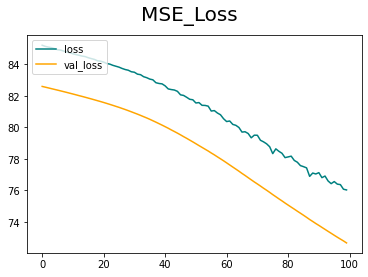

In [83]:
# Graficamos la pérdida
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('MSE_Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

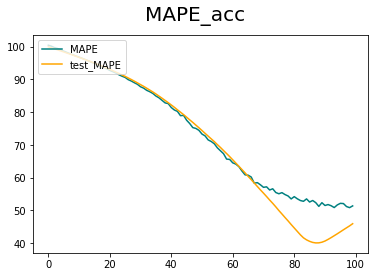

In [84]:
# Graficamos la métrica MAPE
fig = plt.figure()
plt.plot(hist.history['MAPE'], color='teal', label='MAPE')
plt.plot(hist.history['val_MAPE'], color='orange', label='test_MAPE')
fig.suptitle('MAPE_acc', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [85]:
# Obtenemos las predicciones
resultado = model.predict(x_val)

15/15 [==============================] - 0s 1ms/step


In [86]:
resultado[0]

array([1.2512997], dtype=float32)

In [87]:
# Obtener métrica de precisión MAPE
def mape (actual , pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.mean (np.abs ((actual - pred) / actual)) * 100

In [88]:
# Comparamos la predicción con los datos de validación
mape(y_val, resultado)

45.76513284701932

In [94]:
# Comparamos los resultados visualmente
compare = pd.DataFrame(y_val)
compare['pred'] = resultado
compare.head(60)

,0,pred
0,7.0,1.251300
1,1.0,1.183314
2,4.0,1.181176
3,1.0,1.181042
4,1.0,1.169452
5,1.0,1.233702
6,1.0,1.196865
7,24.0,1.179081
8,1.0,1.288059
9,32.0,1.128132


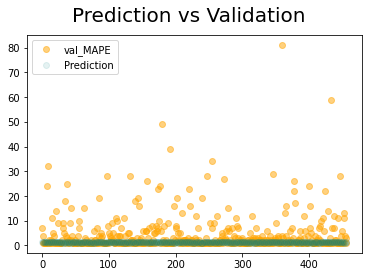

In [89]:
# Ahora comparamos con un gráfico normal
fig = plt.figure()
plt.plot(y_val, 'o',color='orange', label='val_MAPE', alpha=0.5)
plt.plot(resultado, 'o', color='teal', label='Prediction', alpha=0.1)
fig.suptitle('Prediction vs Validation', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Podemos ver que a pesar de los intentos por mejorar el modelo cambiando hiperparámetros, no es posible porque una gran parte de datos es de 1 y también porque los datos en general son muy pocos para la cantidad de cosas que se deben de analizar.

Quizá sea posible usar otro tipo modelo para obtener otra predicción, aunque lo veo poco posible por las razones ya descritas.